In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, normalize, StandardScaler, LabelEncoder

In [67]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, normalize, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, r2_score
from sklearn.svm import SVC
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam ,  RMSprop
from keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from keras.metrics import Accuracy

In [7]:
df = pd.read_csv('/content/drive/MyDrive/ANN/wine_data.csv')
df = df.iloc[:,1:]
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [ ]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [ ]:
df.mean()

fixed acidity             7.215307
volatile acidity          0.339666
citric acid               0.318633
residual sugar            5.443235
chlorides                 0.056034
free sulfur dioxide      30.525319
total sulfur dioxide    115.744574
density                   0.994697
pH                        3.218501
sulphates                 0.531268
alcohol                  10.491801
quality                   5.818378
dtype: float64

In [ ]:
df.median()

fixed acidity             7.00000
volatile acidity          0.29000
citric acid               0.31000
residual sugar            3.00000
chlorides                 0.04700
free sulfur dioxide      29.00000
total sulfur dioxide    118.00000
density                   0.99489
pH                        3.21000
sulphates                 0.51000
alcohol                  10.30000
quality                   6.00000
dtype: float64

In [ ]:
df.std()

fixed acidity            1.296434
volatile acidity         0.164636
citric acid              0.145318
residual sugar           4.757804
chlorides                0.035034
free sulfur dioxide     17.749400
total sulfur dioxide    56.521855
density                  0.002999
pH                       0.160787
sulphates                0.148806
alcohol                  1.192712
quality                  0.873255
dtype: float64

In [ ]:
df.min()

fixed acidity           3.80000
volatile acidity        0.08000
citric acid             0.00000
residual sugar          0.60000
chlorides               0.00900
free sulfur dioxide     1.00000
total sulfur dioxide    6.00000
density                 0.98711
pH                      2.72000
sulphates               0.22000
alcohol                 8.00000
quality                 3.00000
dtype: float64

In [38]:
df.max()

fixed acidity            15.90000
volatile acidity          1.58000
citric acid               1.66000
residual sugar           65.80000
chlorides                 0.61100
free sulfur dioxide     289.00000
total sulfur dioxide    440.00000
density                   1.03898
pH                        4.01000
sulphates                 2.00000
alcohol                  14.90000
quality                   9.00000
dtype: float64

In [ ]:
dict(df.max())

{'fixed acidity': 15.9,
 'volatile acidity': 1.58,
 'citric acid': 1.66,
 'residual sugar': 65.8,
 'chlorides': 0.611,
 'free sulfur dioxide': 289.0,
 'total sulfur dioxide': 440.0,
 'density': 1.03898,
 'pH': 4.01,
 'sulphates': 2.0,
 'alcohol': 14.9,
 'quality': 9.0}

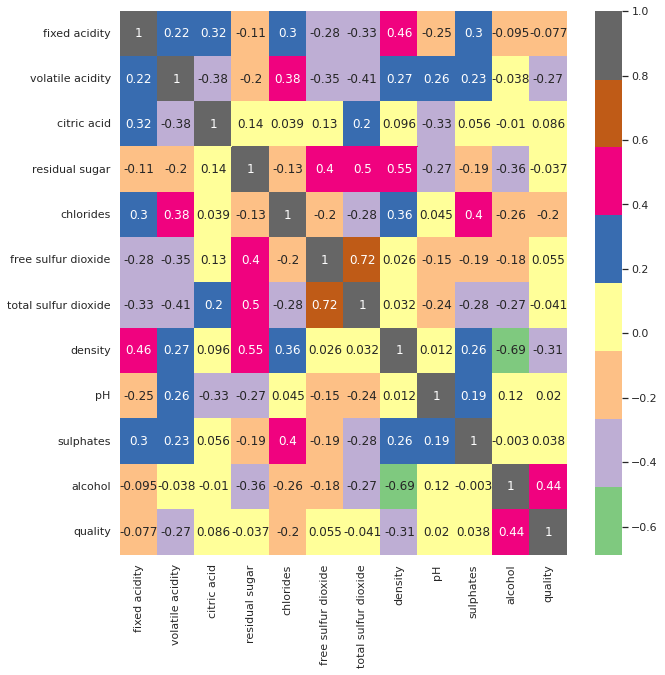

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.Accent)

In [42]:

x = df.drop(labels=['quality'] , axis=1)
y = df['quality']

In [43]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [44]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [45]:
citricacid = x['fixed acidity'] * x['citric acid']
citric_acidity = pd.DataFrame(citricacid, columns=['citric_accidity'])

density_acidity = x['fixed acidity'] * x['density']
density_acidity = pd.DataFrame(density_acidity, columns=['density_acidity'])

In [46]:
density_acidity

,density_acidity
0,7.383720
1,7.775040
2,7.776600
3,11.177600
4,7.383720
...,...
6492,6.145068
6493,6.566340
6494,6.451510
6495,5.437795


In [47]:
citric_acidity = pd.DataFrame(citricacid, columns=['citric_accidity'])


In [49]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [51]:
x = x.join(citric_acidity).join(density_acidity)

In [52]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,citric_accidity,density_acidity
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.000,7.38372
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0.000,7.77504
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0.312,7.77660
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.272,11.17760
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.000,7.38372


In [53]:
y

0       5
1       5
2       5
3       6
4       5
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 6497, dtype: int64

In [56]:
bin=(2,6,8)
gname = ['bad','good']
y = pd.cut(y,bins=bin ,labels=gname)

In [57]:
y

0        bad
1        bad
2        bad
3        bad
4        bad
        ... 
6492     bad
6493     bad
6494     bad
6495    good
6496     bad
Name: quality, Length: 6497, dtype: category
Categories (2, object): ['bad' < 'good']

In [60]:
lb = LabelEncoder()
y = lb.fit_transform(y)

In [61]:
y

array([0, 0, 0, ..., 0, 1, 0])

In [62]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,citric_accidity,density_acidity
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.000,7.38372
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0.000,7.77504
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0.312,7.77660
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.272,11.17760
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.000,7.38372


In [63]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,  test_size=0.3)

In [64]:
scale = StandardScaler()

x_train_scaled = scale.fit_transform(xtrain)
x_test_scaled = scale.transform(xtest)

In [65]:
pd.DataFrame(x_train_scaled).describe().round(2).iloc[1:3]

,0,1,2,3,4,5,6,7,8,9,10,11,12
mean,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [74]:
x_train_scaled.shape

(4547, 13)

In [68]:
NeuralModel = Sequential([
                          Dense(128, activation='relu', input_shape=(13,)),
                          Dense(32, activation='relu'),
                          Dense(64, activation='relu'),
                          Dense(64, activation='relu'),
                          Dense(64, activation='relu'),
                          Dense(1, activation='sigmoid')
])

In [69]:
NeuralModel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1792      
                                                                 
 dense_9 (Dense)             (None, 32)                4128      
                                                                 
 dense_10 (Dense)            (None, 64)                2112      
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16,417
Trainable params: 16,417
Non-trai

In [73]:
rms = Adam(lr=0.0003)      # optimizer with learning rate

NeuralModel.compile(optimizer=rms, loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [75]:
history =NeuralModel.fit(x_train_scaled,ytrain, epochs=100, validation_data=(x_test_scaled,ytest))

Epoch 1/100
143/143 [==============================] - 2s 5ms/step - loss: 0.4786 - accuracy: 0.7992 - val_loss: 0.3949 - val_accuracy: 0.8128
Epoch 2/100
143/143 [==============================] - 1s 4ms/step - loss: 0.3988 - accuracy: 0.8153 - val_loss: 0.3630 - val_accuracy: 0.8482
Epoch 3/100
143/143 [==============================] - 1s 4ms/step - loss: 0.3781 - accuracy: 0.8274 - val_loss: 0.3545 - val_accuracy: 0.8313
Epoch 4/100
143/143 [==============================] - 1s 4ms/step - loss: 0.3670 - accuracy: 0.8274 - val_loss: 0.3485 - val_accuracy: 0.8405
Epoch 5/100
143/143 [==============================] - 1s 4ms/step - loss: 0.3549 - accuracy: 0.8335 - val_loss: 0.3431 - val_accuracy: 0.8374
Epoch 6/100
143/143 [==============================] - 1s 4ms/step - loss: 0.3474 - accuracy: 0.8366 - val_loss: 0.3407 - val_accuracy: 0.8400
Epoch 7/100
143/143 [==============================] - 1s 4ms/step - loss: 0.3395 - accuracy: 0.8379 - val_loss: 0.3360 - val_accuracy: 0.8421

In [77]:
histo = pd.DataFrame(history.history)

In [78]:
histo

,loss,accuracy,val_loss,val_accuracy
0,0.478635,0.799208,0.394933,0.812820
1,0.398757,0.815263,0.362965,0.848205
2,0.378073,0.827359,0.354465,0.831282
3,0.366964,0.827359,0.348502,0.840513
4,0.354862,0.833517,0.343142,0.837436
...,...,...,...,...
95,0.061591,0.975808,0.986824,0.829231
96,0.077225,0.966571,0.886644,0.838462
97,0.029335,0.983506,0.875070,0.853333
98,0.020085,0.987904,0.874862,0.853333


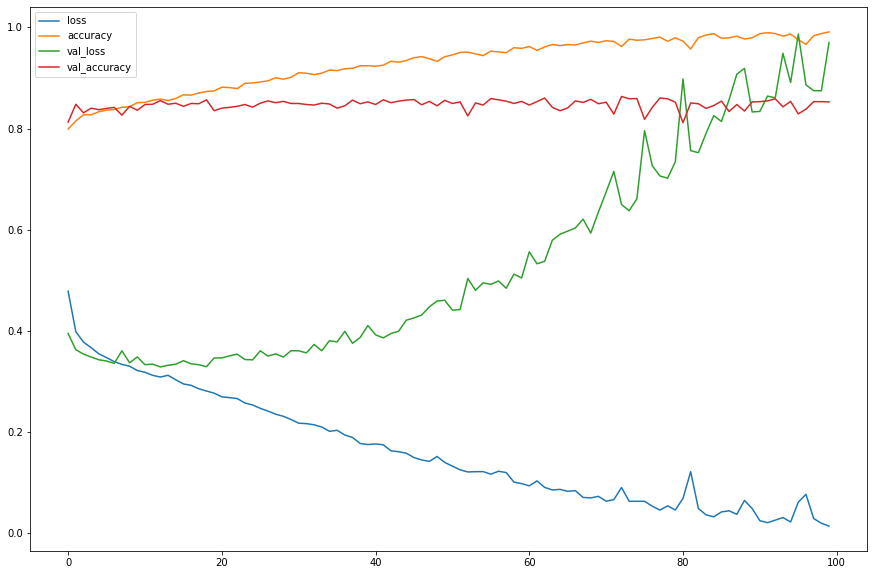

In [82]:
histo.plot(figsize=(15,10))

In [118]:
NeuralModel.save('/content/drive/MyDrive/ANN/wine_modelwith99.h5')

In [122]:
model = tf.keras.models.load_model('/content/drive/MyDrive/ANN/wine_modelwith99.h5')

In [87]:
model.evaluate(x_test_scaled,ytest)

61/61 [==============================] - 0s 2ms/step - loss: 0.9703 - accuracy: 0.8528


[0.9703440070152283, 0.8528205156326294]

In [89]:
y_pred = model.predict(x_test_scaled)
y_pred

array([[6.9488873e-11],
       [1.2117132e-06],
       [1.4450049e-11],
       ...,
       [1.0953604e-05],
       [9.9972206e-01],
       [7.0446754e-07]], dtype=float32)

Ask to the sir why i am getting this type of difference in depth

In [90]:
x_test.shape

(1300, 11)

In [91]:
y_pred.shape

(1950, 1)

In [94]:
y_pred[y_pred > 0.5]

array([0.81934476, 0.93908167, 0.514575  , 0.8986284 , 0.9999064 ,
       0.99754083, 0.9137268 , 0.9982364 , 0.9999939 , 0.99997854,
       0.9886091 , 0.9999378 , 0.99264646, 0.76537794, 0.999137  ,
       0.9998425 , 0.9999063 , 0.9979455 , 0.99482405, 0.9930269 ,
       0.977993  , 0.9538416 , 0.9985689 , 0.95469785, 0.9999795 ,
       0.8380736 , 0.98360497, 0.99995923, 0.99609816, 0.9995369 ,
       0.9497804 , 0.8340466 , 0.98388094, 0.7362522 , 0.97830427,
       0.5773753 , 0.8347183 , 0.9851762 , 0.9475351 , 0.97144216,
       0.9999975 , 0.58501685, 0.9869856 , 0.9789145 , 0.99958974,
       0.7884886 , 0.89280725, 0.9971137 , 0.98390377, 0.99996305,
       0.63286895, 0.99999976, 0.9437531 , 0.9999794 , 0.9999999 ,
       1.        , 0.9999527 , 0.97324896, 0.9925454 , 0.99999964,
       0.77903664, 0.9989561 , 0.99977285, 0.85858226, 0.91258687,
       0.87878126, 0.9986628 , 0.99991155, 0.9314475 , 0.8971314 ,
       0.94952905, 0.95372504, 0.8864235 , 0.99795866, 0.65358

In [95]:
y_pred[y_pred > 0.5].shape


(384,)

In [100]:

x.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,citric_accidity,density_acidity
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,7.38372
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0.0,7.77504


predict the category of wine for the first record

In [97]:
x_test_scaled[0]

array([ 1.8004334 ,  2.40328068, -1.51886649, -0.70795122,  0.68074647,
       -1.38124006, -1.52541728,  1.29265457,  0.06535763,  0.20296214,
       -0.33098152, -1.05664879,  1.81057561])

In [102]:
ytest[0]

0

In [109]:
output1 =model.predict([[ 1.8004334 ,  2.40328068, -1.51886649, -0.70795122,  0.68074647,
       -1.38124006, -1.52541728,  1.29265457,  0.06535763,  0.20296214,
       -0.33098152, -1.05664879,  1.81057561]])

In [111]:
output1

array([[6.94894e-11]], dtype=float32)

In [112]:
output1[0][0]

# probability of output is sixty percentage to a good categoris of wine
# and it is totaly depends on you and your accuracy what you want the maximum accuracy

6.94894e-11

for the second one

In [114]:
ytest[3]

0

In [115]:
x_test_scaled[3]

array([-0.63080582, -0.23677031,  0.91177504, -0.41676021,  4.11456454,
        2.55311705,  1.13578038, -0.16154234, -1.24766661, -0.95019995,
       -1.16623928,  0.39496701, -0.62848774])

In [117]:
model.predict([[-0.63080582, -0.23677031,  0.91177504, -0.41676021,  4.11456454,
        2.55311705,  1.13578038, -0.16154234, -1.24766661, -0.95019995,
       -1.16623928,  0.39496701, -0.62848774]])[0][0]

4.0545305e-20

project finished with 99%

`this is prectice on this **dataset**`

In [19]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers

In [29]:
LAYER = [tf.keras.layers.Dense(units=30,kernel_initializer='he_uniform',activation='relu',input_shape=[11],name='inputlayer'),
          tf.keras.layers.Dense(units=25,kernel_initializer='he_uniform',activation='relu'),
         tf.keras.layers.Dense(units=20,kernel_initializer='he_uniform',activation='relu' ),
         tf.keras.layers.Dense(units=15,kernel_initializer='he_uniform',activation='relu'),
         tf.keras.layers.Dense(units=7,kernel_initializer='he_uniform',activation='softmax')]

In [32]:
modelll = tf.keras.models.Sequential(LAYER)

In [33]:
modelll.compile(loss='sparse_categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

In [37]:
history = modell.fit(x_train,y_train,validation_split=0.33,batch_size=20,epochs=5)

Epoch 1/5
175/175 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/5
175/175 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/5
175/175 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/5
175/175 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/5
175/175 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00


In [ ]:

modell.add(Dense(units=30,kernel_initializer='he_uniform',activation='relu' ,input_dim=x_train.shape[1]))
modell.add(Dense(units=25,kernel_initializer='he_uniform',activation='relu' ))
modell.add(Dense(units=20,kernel_initializer='he_uniform',activation='relu' ))
modell.add(Dense(units=15,kernel_initializer='he_uniform',activation='relu' ))
modell.add(Dense(units=7,kernel_initializer='he_uniform',activation='softmax'))
modell.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])